In [1]:
#Lucas Ross 13 Jan 2023

#import things
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm

#no need to use plt.show()
%matplotlib inline

# Honey Production Data Visualization Assignment 1

In [2]:
#import file
df = pd.read_csv("honeyproduction.csv")

In [3]:
#EDA
print(df.head(5)) #first 5 rows
print(df.tail(5)) #last 5 rows
print(df.shape) #dimensions
print(df.describe(include='all').T) #metrics (show all metrics, including objects, and transpose)
print(df.info()) #col type

        state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0     Alabama   16000.0           71   1136000.0    159000.0        0.72   
1     Arizona   55000.0           60   3300000.0   1485000.0        0.64   
2    Arkansas   53000.0           65   3445000.0   1688000.0        0.59   
3  California  450000.0           83  37350000.0  12326000.0        0.62   
4    Colorado   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
             state   numcol  yieldpercol  totalprod     stocks  priceperlb  \
780       Virginia   5000.0           38   190000.0    30000.0        5.85   
781     Washington  84000.0           35  2940000.0   412000.0        1.99   
782  West Virginia   5000.0           32   160000.0    43000.0        3.92   
783      Wisconsin  54000.0           62  3348000.0  1205000.0        2.67   
784        Wyoming  4

**observations:**
- dataset tracks honey production from 1998 to 2016 in every US state
- all columns are numerical except for "state", which is string object
- no null objects
- 785 records

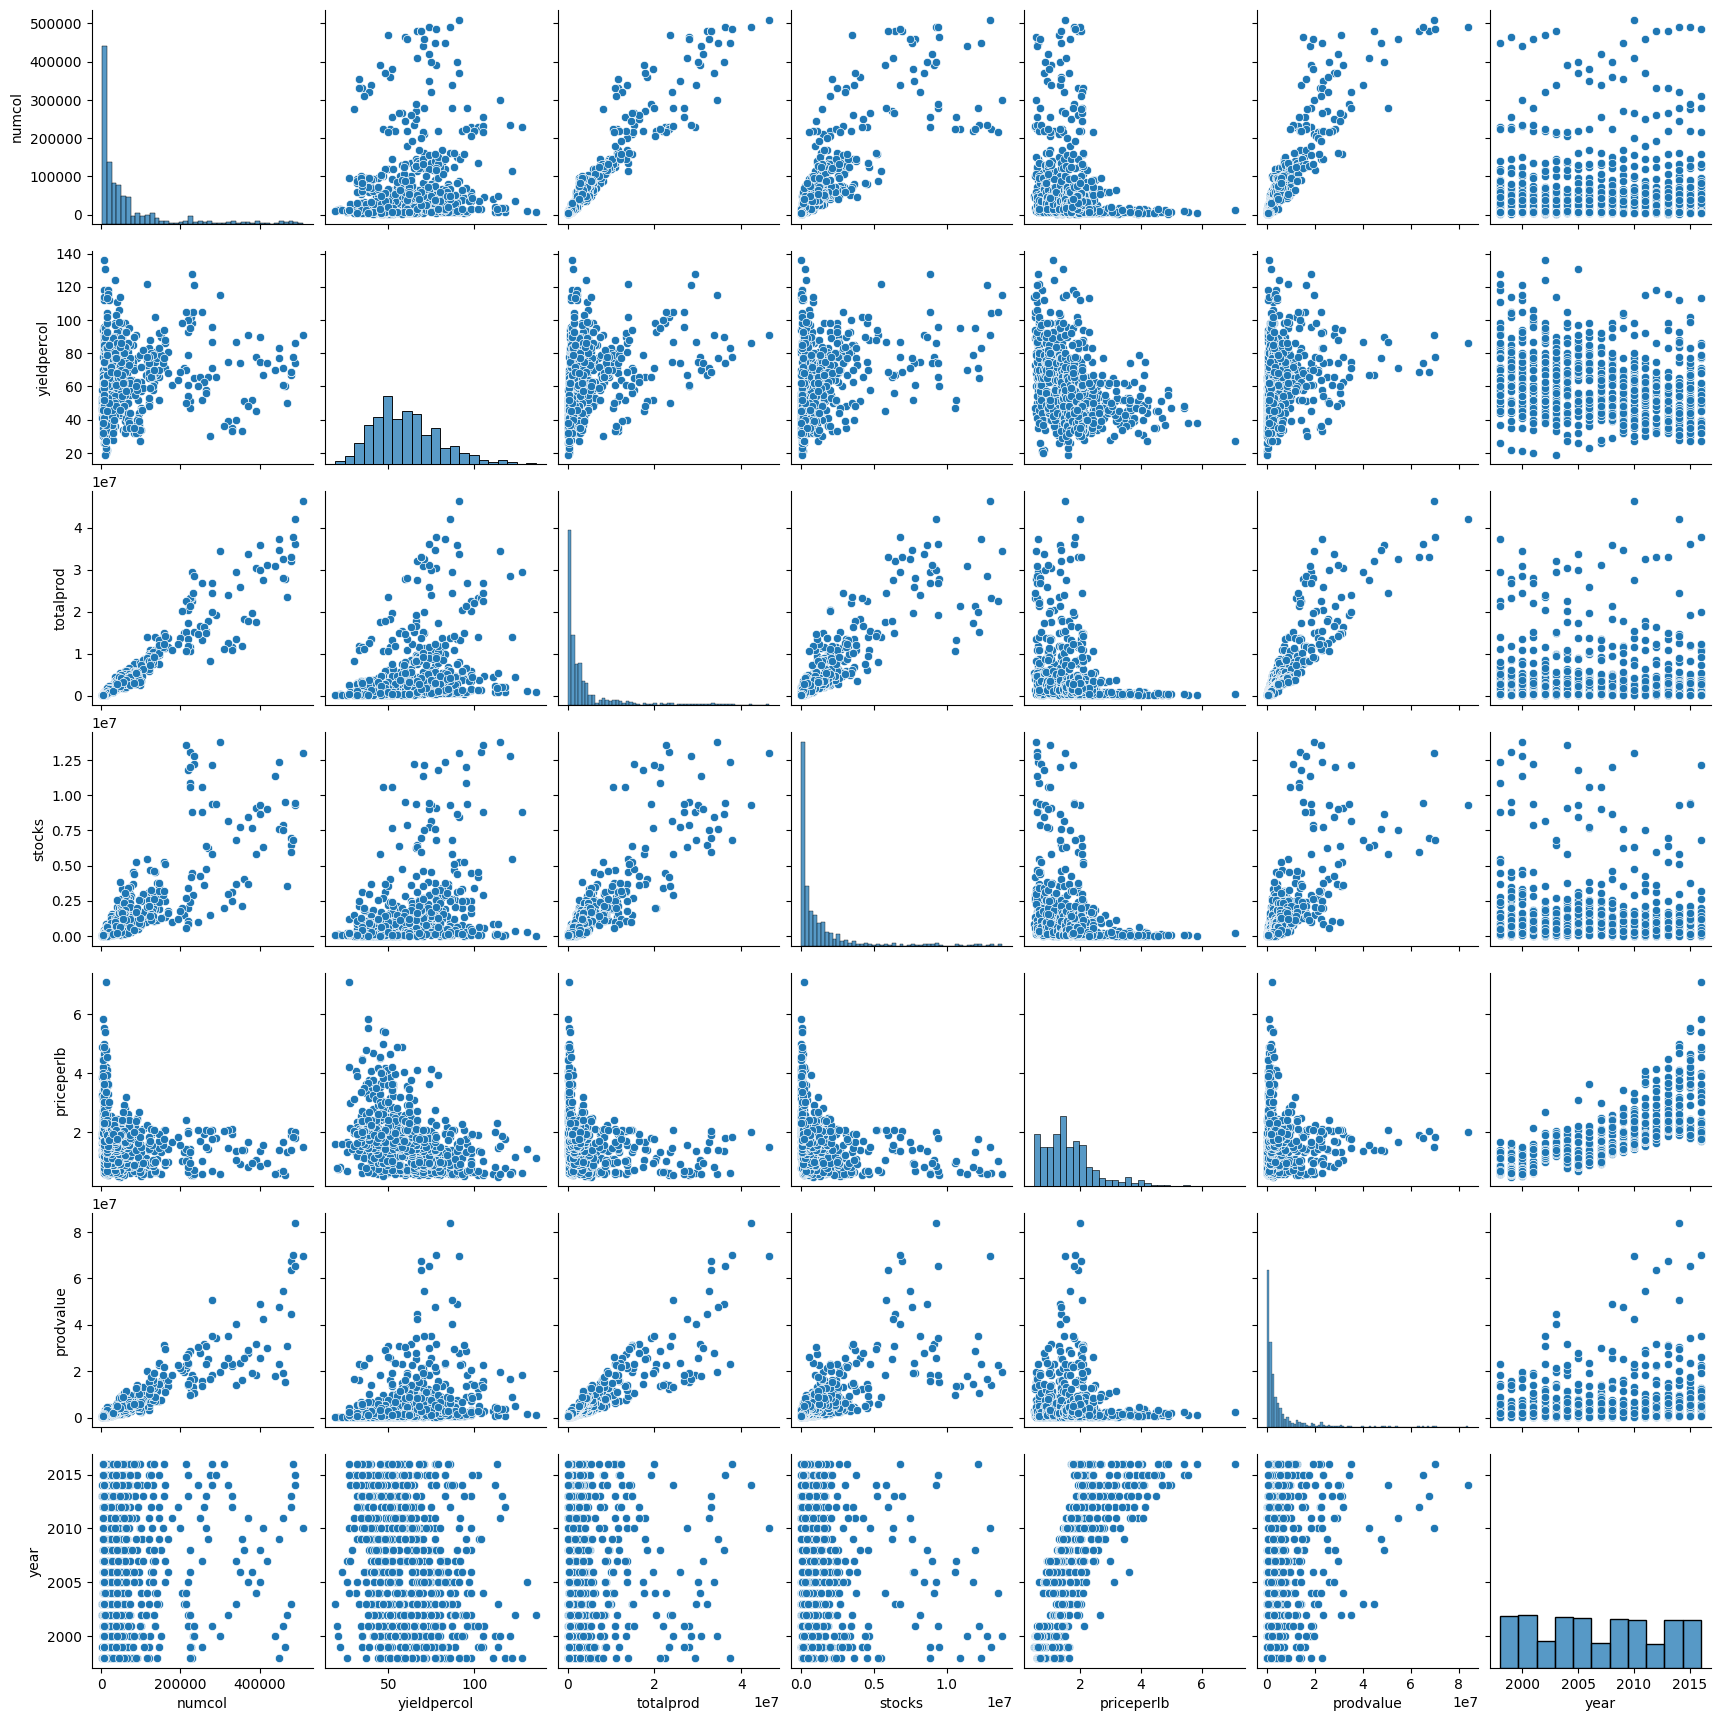

In [4]:
#pairplot
sns.pairplot(data=df)

**observations:**
- "priceperlb" seems to increase every year
- "yieldpercol" is pretty evenly distributed (makes sense because depends on bee production, not human production)
- as "numcol" increases, "totalprod" disperses more and seems to increase

# How has honey production yield changed over the years from 1998 to 2016?

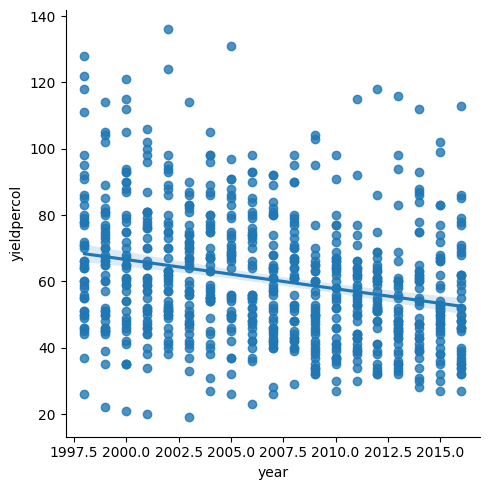

In [5]:
sns.lmplot(data=df, x="year", y="yieldpercol") #linear model plot

**observations:**
- average yield per colony has gone down from 1998 to 2016
- confidence interval is low
- negative correlation

Over the years, the average honey production yield has gone down. However, this negative correlation is weak.

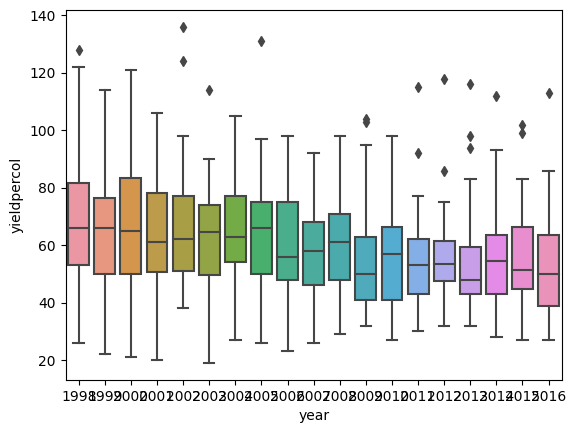

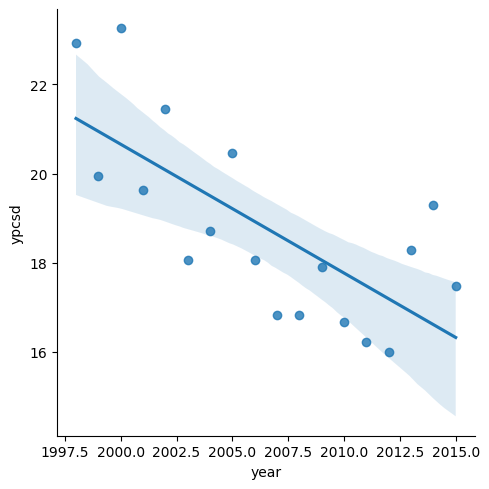

In [6]:
#boxplot + standard deviation lm plot will show the dispersion of yieldpercol per year
sns.boxplot(data=df, x="year", y="yieldpercol") #boxplot

years = range(df["year"].min(), df["year"].max()) #keep track of years (iterate through min and max vals of year)
sd = [] #keep track of SDs
for i in years:
    sd.append(df["yieldpercol"].loc[df["year"]==i].std()) #get all ypc where year = curr year, then get sd

#make a new temp df for lmplot
tempdf = pd.DataFrame({
    "ypcsd":sd,
    "year":years
})

#now plot sds and find best fit line
sns.lmplot(data=tempdf, x="year", y="ypcsd")

**observations:**
- lmplot shows that dispersion (sd) seems to go down on average (but confidence interval is still quite high)
- lmplot also shows negative correlation between yieldpercol and year
- boxplot shows that while dispersion decreases over time, outliers increase (which is interesting)
- boxplot also reveals that honey production seemed to be somewhat stable from 2006-2008

In addition, the dispersion of the yearly honey yield decreases overtime, suggesting that refined technique and procedures have made honey production very efficient.

# Over time, what have been the major production trends across the states?

In [7]:
#sns.lmplot(data=df, x="year", y="totalprod", hue="state") 
#this plot doesnt work because the color palette is too hard to read for 50 states

#interactive graph allows us to see all 50 states easily
prodyear = px.scatter(df, x="year", y="totalprod", color="state", trendline="ols") #ordinary least squares line
prodyear.show()

**observations:**
- most states have not changed in their honey production from 1998 to 2016
- north dakota has substantially higher honey production, and the gap between it and the other states grows every year
- south dakota has large production and hasnt really changed
- california has had a rapid decline of honey production, nonetheless it still produces a lot of honey
- florida has also declined in its honey production

North Dakota has always been the country's largest honey production state, and the gap grows every year. Furthermore,
California and Florida have both declined in production. South Dakota has also had historically large honey production,
and has not fluctuated in production too much. Otherwise, the other states produce similar quantities of honey and have 
not fluctuated too much.

As of 2016, Montana, South and North Dakota lead honey production. These states suggest that the climate in the north is
better suited for honey production, and could explain why California declined in production over time (maybe connected
to recent droughts and wildfires, which led to lack of forage and moisture, causing Colony Collapse Disorder).

# Are there any pattern that can be observed between total honey production and the value of production every year? How has the value of production that could be tied to demand, changed every year?

<AxesSubplot:>

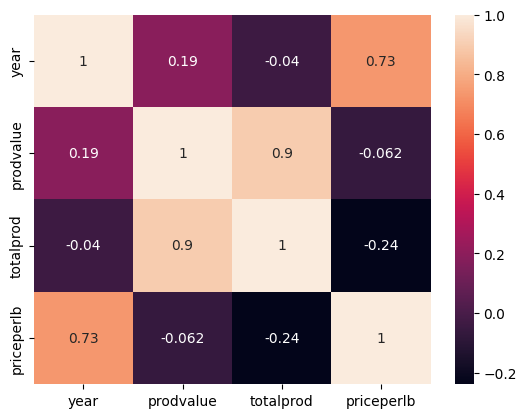

In [8]:
#since prodvalue = totalprod * priceperlb, lets see all of their correlations with year and eachother
sns.heatmap(df[["year", "prodvalue", "totalprod", "priceperlb"]].corr(), annot=True)

**observations:**
- prodvalue has weak positive correlation to year
- totalprod has very weak negative correlation to year
- priceperlb has a positive correlation to year

This heatmap suggests that there is no pattern to the correlation of totalprod/prodvalue and year. However, it is interesting to note that the correlation between prodvalue and year is almost between the correlations of totalprod/priceperlb and year. This makes sense, as prodvalue (usd) = totalprod (lbs) * priceperlb(usd/lbs).

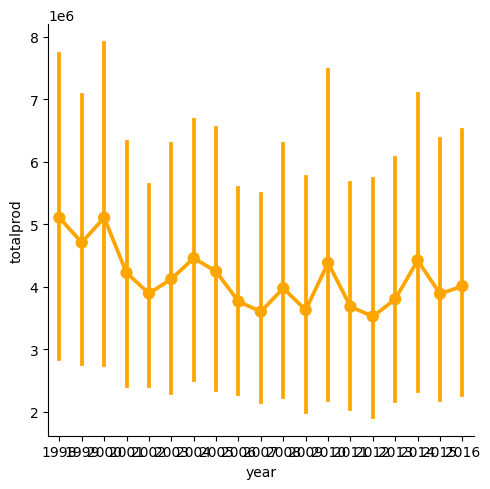

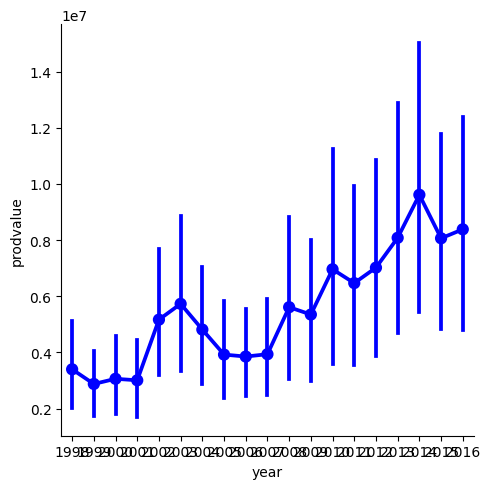

In [9]:
#use boxplots to get a sense of dispersion of totalprod and prodvalue
sns.catplot(data=df, x="year", y="totalprod", kind="point", color="orange")
sns.catplot(data=df, x="year", y="prodvalue", kind="point", color="blue")

**observations:**
- prodvalue seems to have a general upward trend, whereas totalprod goes slightly down (confirmed by corr. matrix)
- prodvalue has low dispersion until around 2007, where it increases and has higher dispersion

The increasing production value and decreasing production suggests that there is more demand for honey, but there is not enough supply due to decrease in total honey production. The demand may be attributed to attempts to preserve bee populations as Colony Collapse Disorder disloctates many colonies.